<a href="https://colab.research.google.com/github/SSrishti-14/AI_Lab/blob/main/assignments_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Algorithm Comparison:
BFS: Path - [1, 2, 3], Nodes Explored - 4, Time - 0.000031 sec
DFS: Path - [1, 4, 5, 3], Nodes Explored - 4, Time - 0.000012 sec
Bi-BFS: Path - None, Nodes Explored - 3, Time - 0.000021 sec
UCS: Path - [1, 2, 3], Nodes Explored - 3, Time - 0.000018 sec
Best-First: Path - [1, 2, 3], Nodes Explored - 3, Time - 0.000015 sec
A*: Path - [1, 2, 3], Nodes Explored - 3, Time - 0.000008 sec


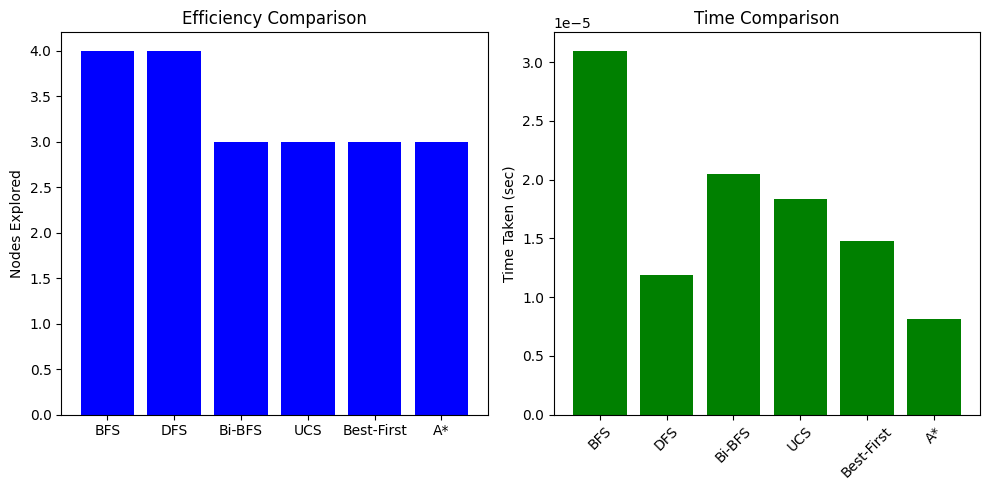

In [ ]:
#10
import heapq
import time
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Graph:
    def __init__(self, edges, directed=False):
        self.graph = {}
        for src, dest, cost in edges:
            self.graph.setdefault(src, []).append((dest, cost))
            if not directed:
                self.graph.setdefault(dest, []).append((src, cost))

    def bfs(self, start, goal):
        queue = deque([(start, [start])])
        visited = set()
        while queue:
            node, path = queue.popleft()
            if node in visited:
                continue
            visited.add(node)
            if node == goal:
                return path, len(visited)
            for neighbor, _ in self.graph.get(node, []):
                queue.append((neighbor, path + [neighbor]))
        return None, len(visited)

    def dfs(self, start, goal):
        stack = [(start, [start])]
        visited = set()
        while stack:
            node, path = stack.pop()
            if node in visited:
                continue
            visited.add(node)
            if node == goal:
                return path, len(visited)
            for neighbor, _ in self.graph.get(node, []):
                stack.append((neighbor, path + [neighbor]))
        return None, len(visited)

    def bidirectional_bfs(self, start, goal):
        forward_queue = deque([(start, [start])])
        backward_queue = deque([(goal, [goal])])
        forward_visited, backward_visited = {}, {}
        while forward_queue and backward_queue:
            if self._expand(forward_queue, forward_visited, backward_visited):
                return self._merge_paths(forward_visited, backward_visited), len(forward_visited) + len(backward_visited)
            if self._expand(backward_queue, backward_visited, forward_visited):
                return self._merge_paths(forward_visited, backward_visited), len(forward_visited) + len(backward_visited)
        return None, len(forward_visited) + len(backward_visited)

    def _expand(self, queue, visited, other_visited):
        if not queue:
            return False
        node, path = queue.popleft()
        if node in other_visited:
            return True
        visited[node] = path
        for neighbor, _ in self.graph.get(node, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
        return False

    def _merge_paths(self, forward_visited, backward_visited):
        common_node = set(forward_visited.keys()) & set(backward_visited.keys())
        if common_node:
            node = common_node.pop()
            return forward_visited[node] + backward_visited[node][::-1][1:]
        return None

    def uniform_cost_search(self, start, goal):
        return self._best_search(start, goal, lambda node: 0, use_g=True)

    def best_first_search(self, start, goal, heuristic):
        return self._best_search(start, goal, heuristic)

    def astar_search(self, start, goal, heuristic):
        return self._best_search(start, goal, heuristic, use_g=True)

    def _best_search(self, start, goal, heuristic, use_g=False):
        pq = [(0, start, [start])]
        visited = {}
        while pq:
            priority, node, path = heapq.heappop(pq)
            if node in visited and visited[node] <= priority:
                continue
            visited[node] = priority
            if node == goal:
                return path, len(visited)
            for neighbor, edge_cost in self.graph.get(node, []):
                new_cost = (priority + edge_cost) if use_g else 0
                new_priority = new_cost + heuristic(neighbor)
                heapq.heappush(pq, (new_priority, neighbor, path + [neighbor]))
        return None, len(visited)

def heuristic(node):
    # Example heuristic: always returns 0 (replace with actual heuristic)
    return 0

edges = [(1, 2, 1), (2, 3, 1), (1, 4, 2), (4, 5, 2), (5, 3, 1)]
graph = Graph(edges)

algorithms = {
    "BFS": lambda s, g: graph.bfs(s, g),
    "DFS": lambda s, g: graph.dfs(s, g),
    "Bi-BFS": lambda s, g: graph.bidirectional_bfs(s, g),
    "UCS": lambda s, g: graph.uniform_cost_search(s, g),
    "Best-First": lambda s, g: graph.best_first_search(s, g, heuristic),
    "A*": lambda s, g: graph.astar_search(s, g, heuristic)
}

results = {}
for name, algo in algorithms.items():
    start_time = time.time()
    path, nodes_explored = algo(1, 3)
    end_time = time.time()
    results[name] = (path, nodes_explored, end_time - start_time)

print("\nAlgorithm Comparison:")
for name, (path, nodes_explored, time_taken) in results.items():
    print(f"{name}: Path - {path}, Nodes Explored - {nodes_explored}, Time - {time_taken:.6f} sec")

# Visualization
plt.figure(figsize=(10, 5))
labels = list(results.keys())
nodes_explored = [results[k][1] for k in labels]
time_taken = [results[k][2] for k in labels]

plt.subplot(1, 2, 1)
plt.bar(labels, nodes_explored, color='blue')
plt.ylabel("Nodes Explored")
plt.title("Efficiency Comparison")

plt.subplot(1, 2, 2)
plt.bar(labels, time_taken, color='green')
plt.ylabel("Time Taken (sec)")
plt.title("Time Comparison")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#16
import heapq
import time
from collections import deque

class PuzzleState:
    def __init__(self, tiles, parent=None, move=None, depth=0):
        self.tiles = tuple(tiles)
        self.blank = self.tiles.index(0)
        self.parent = parent
        self.move = move
        self.depth = depth

    def __eq__(self, other):
        return self.tiles == other.tiles

    def __hash__(self):
        return hash(self.tiles)

    def __lt__(self, other):
        return False  # For priority queue comparison

    def get_grid(self):
        return [self.tiles[i*3:(i+1)*3] for i in range(3)]

    def print_grid(self):
        grid = self.get_grid()
        print("+---+---+---+")
        for row in grid:
            print("|" + "|".join(f" {tile} " if tile !=0 else "   " for tile in row) + "|")
            print("+---+---+---+")

    def get_children(self):
        children = []
        row, col = divmod(self.blank, 3)

        moves = []
        if row > 0: moves.append(('Up', -3))
        if row < 2: moves.append(('Down', 3))
        if col > 0: moves.append(('Left', -1))
        if col < 2: moves.append(('Right', 1))

        for direction, delta in moves:
            new_tiles = list(self.tiles)
            new_blank = self.blank + delta
            new_tiles[self.blank], new_tiles[new_blank] = new_tiles[new_blank], new_tiles[self.blank]
            children.append(PuzzleState(
                tiles=new_tiles,
                parent=self,
                move=direction,
                depth=self.depth + 1
            ))

        return children

def manhattan_distance(state):
    distance = 0
    for idx, tile in enumerate(state.tiles):
        if tile == 0: continue
        goal_row, goal_col = divmod(tile-1, 3)
        current_row, current_col = divmod(idx, 3)
        distance += abs(goal_row - current_row) + abs(goal_col - current_col)
    return distance

def misplaced_tiles(state):
    return sum(1 for idx, tile in enumerate(state.tiles)
              if tile != 0 and tile != idx + 1)

def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current.tiles)
        current = came_from[current]
    path.append(current.tiles)
    path.reverse()
    return path

def a_star(start, heuristic_func):
    open_set = []
    start_h = heuristic_func(start)
    heapq.heappush(open_set, (start_h, 0, start))

    came_from = {}
    g_score = {start: 0}
    visited = set()
    nodes_expanded = 0

    while open_set:
        f, g, current = heapq.heappop(open_set)

        if current.tiles == GOAL.tiles:
            return reconstruct_path(came_from, current), nodes_expanded, g

        if current in visited:
            continue
        visited.add(current)
        nodes_expanded += 1

        for child in current.get_children():
            tentative_g = g + 1
            if child not in g_score or tentative_g < g_score.get(child, float('inf')):
                came_from[child] = current
                g_score[child] = tentative_g
                f = tentative_g + heuristic_func(child)
                heapq.heappush(open_set, (f, tentative_g, child))

    return None, nodes_expanded, 0

def gbfs(start, heuristic_func):
    open_set = []
    heapq.heappush(open_set, (heuristic_func(start), start))
    came_from = {}
    visited = set()
    nodes_expanded = 0

    while open_set:
        h, current = heapq.heappop(open_set)

        if current.tiles == GOAL.tiles:
            return reconstruct_path(came_from, current), nodes_expanded, len(reconstruct_path(came_from, current))-1

        if current in visited:
            continue
        visited.add(current)
        nodes_expanded += 1

        for child in current.get_children():
            if child not in visited:
                came_from[child] = current
                heapq.heappush(open_set, (heuristic_func(child), child))

    return None, nodes_expanded, 0

def test_algorithm(algorithm, heuristic_func, start_state):
    start_time = time.time()
    path, nodes, cost = algorithm(start_state, heuristic_func)
    elapsed = time.time() - start_time
    return {
        'path_length': len(path)-1 if path else None,
        'nodes_expanded': nodes,
        'time': elapsed,
        'solution': path
    }

def print_results(results):
    print(f"{'Algorithm':<15} | {'Heuristic':<15} | {'Path Length':<10} | {'Nodes Expanded':<15} | {'Time (s)':<10}")
    print("-"*75)
    for algo in results:
        for heuristic in results[algo]:
            res = results[algo][heuristic]
            print(f"{algo:<15} | {heuristic:<15} | {res['path_length'] or 'N/A':<10} | {res['nodes_expanded']:<15} | {res['time']:.6f}")

def print_solution_steps(solution):
    if solution:
        print("Solution Steps:")
        for i, step in enumerate(solution):
            grid = [step[i*3:(i+1)*3] for i in range(3)]
            print(f"Step {i}:")
            print("+---+---+---+")
            for row in grid:
                print("|" + "|".join(f" {tile} " if tile !=0 else "   " for tile in row) + "|")
                print("+---+---+---+")
            print()
    else:
        print("No solution found.")

# Initialize goal state
GOAL = PuzzleState([1,2,3,4,5,6,7,8,0])

if __name__ == "__main__":
    # Example test case
    initial = PuzzleState([7,2,4,5,6,0,8,3,1])
    print("Initial State:")
    initial.print_grid()

    if not is_solvable(initial.tiles):
        print("Unsolvable puzzle!")
    else:
        results = {
            'A*': {
                'Manhattan': test_algorithm(a_star, manhattan_distance, initial),
                'Misplaced': test_algorithm(a_star, misplaced_tiles, initial)
            },
            'GBFS': {
                'Manhattan': test_algorithm(gbfs, manhattan_distance, initial),
                'Misplaced': test_algorithm(gbfs, misplaced_tiles, initial)
            }
        }
        print_results(results)

        # Print detailed solution steps for A* with Manhattan Distance
        solution = results['A*']['Manhattan']['solution']
        print_solution_steps(solution)


Initial State:
+---+---+---+
| 7 | 2 | 4 |
+---+---+---+
| 5 | 6 |   |
+---+---+---+
| 8 | 3 | 1 |
+---+---+---+
Algorithm       | Heuristic       | Path Length | Nodes Expanded  | Time (s)  
---------------------------------------------------------------------------
A*              | Manhattan       | 21         | 459             | 0.004976
A*              | Misplaced       | 21         | 5155            | 0.052510
GBFS            | Manhattan       | 105        | 329             | 0.003376
GBFS            | Misplaced       | 125        | 956             | 0.009689
Solution Steps:
Step 0:
+---+---+---+
| 7 | 2 | 4 |
+---+---+---+
| 5 | 6 |   |
+---+---+---+
| 8 | 3 | 1 |
+---+---+---+

Step 1:
+---+---+---+
| 7 | 2 | 4 |
+---+---+---+
| 5 | 6 | 1 |
+---+---+---+
| 8 | 3 |   |
+---+---+---+

Step 2:
+---+---+---+
| 7 | 2 | 4 |
+---+---+---+
| 5 | 6 | 1 |
+---+---+---+
| 8 |   | 3 |
+---+---+---+

Step 3:
+---+---+---+
| 7 | 2 | 4 |
+---+---+---+
| 5 |   | 1 |
+---+---+---+
| 8 | 6 | 3 |

In [ ]:
#15
import copy

class TowerOfHanoi:
    def __init__(self, n):
        self.n = n
        # Initialize with disks on the first rod (largest to smallest)
        self.rods = [[i for i in range(n, 0, -1)], [], []]
        self.current_player = "Human"

    def is_valid_move(self, from_rod, to_rod):
        # Check if from_rod and to_rod are valid indices
        if not (0 <= from_rod < 3 and 0 <= to_rod < 3):
            return False

        # Check if from_rod has disks
        if not self.rods[from_rod]:
            return False

        # Check if to_rod is empty or the top disk on from_rod is smaller than the top disk on to_rod
        # In Tower of Hanoi, smaller numbers represent larger disks
        if not self.rods[to_rod] or self.rods[from_rod][-1] < self.rods[to_rod][-1]:
            return True

        return False

    def make_move(self, from_rod, to_rod):
        if self.is_valid_move(from_rod, to_rod):
            disk = self.rods[from_rod].pop()
            self.rods[to_rod].append(disk)
            return True
        return False

    def display_rods(self):
        print("Current state of the rods:")
        for i, rod in enumerate(self.rods):
            print(f"Rod {i}: {rod}")
        print()

    def minimax(self, depth, alpha, beta, maximizing_player):
        if depth == 0 or self.is_game_over():
            return self.utility_function()

        if maximizing_player:
            max_eval = -float('inf')
            for i in range(3):
                for j in range(3):
                    if i != j and self.is_valid_move(i, j):
                        new_game = copy.deepcopy(self)
                        new_game.make_move(i, j)
                        eval = new_game.minimax(depth-1, alpha, beta, False)
                        max_eval = max(max_eval, eval)
                        alpha = max(alpha, eval)
                        if beta <= alpha:
                            break
            return max_eval
        else:
            min_eval = float('inf')
            for i in range(3):
                for j in range(3):
                    if i != j and self.is_valid_move(i, j):
                        new_game = copy.deepcopy(self)
                        new_game.make_move(i, j)
                        eval = new_game.minimax(depth-1, alpha, beta, True)
                        min_eval = min(min_eval, eval)
                        beta = min(beta, eval)
                        if beta <= alpha:
                            break
            return min_eval

    def utility_function(self):
        # Assign positive scores for moves favorable to the AI
        if len(self.rods[2]) == self.n:  # All disks on the target rod
            return 1000  # High score for winning

        # Prioritize moving disks to the target rod
        # And give higher score for larger disks (smaller numbers) on target rod
        score = 0
        for disk in self.rods[2]:
            score += (self.n - disk + 1) * 10  # Give higher value to larger disks

        return score

    def is_game_over(self):
        # Game is over when all disks are on the third rod
        return len(self.rods[2]) == self.n

    def ai_move(self):
        best_move = None
        best_value = -float('inf')

        for i in range(3):
            for j in range(3):
                if i != j and self.is_valid_move(i, j):
                    new_game = copy.deepcopy(self)
                    new_game.make_move(i, j)
                    # Use a reasonable depth for minimax
                    value = new_game.minimax(2, -float('inf'), float('inf'), False)
                    if value > best_value:
                        best_value = value
                        best_move = (i, j)

        if best_move:
            from_rod, to_rod = best_move
            print(f"AI moves disk from rod {from_rod} to rod {to_rod}")
            self.make_move(from_rod, to_rod)
            return True
        return False

    def play_game(self):
        print("Welcome to Tower of Hanoi!")
        print("The goal is to move all disks to the third rod (rod 2).")
        print("Remember: You can only place smaller disks on larger ones.")
        print("Disk numbers: smaller numbers = larger disks (1 is the largest disk)")

        while not self.is_game_over():
            self.display_rods()

            if self.current_player == "Human":
                try:
                    from_rod = int(input("Enter source rod (0-2): "))
                    to_rod = int(input("Enter destination rod (0-2): "))
                    if self.make_move(from_rod, to_rod):
                        self.current_player = "AI"
                    else:
                        print("Invalid move. Try again.")
                except ValueError:
                    print("Please enter valid numbers.")
            else:
                print("AI's turn...")
                if self.ai_move():
                    self.current_player = "Human"
                else:
                    print("AI couldn't make a move. You win!")
                    break

        self.display_rods()
        if len(self.rods[2]) == self.n:
            print("Game Over! All disks have been moved to the target rod.")
            if self.current_player == "Human":
                print("AI wins!")
            else:
                print("You win!")

if __name__ == "__main__":
    try:
        n = int(input("Enter the number of disks (3-5 recommended): "))
        if n < 1:
            print("Number of disks must be at least 1. Setting to 3.")
            n = 3
        game = TowerOfHanoi(n)
        game.play_game()
    except ValueError:
        print("Invalid input. Starting game with 3 disks.")
        game = TowerOfHanoi(3)
        game.play_game()

Enter the number of disks (3-5 recommended): 3
Welcome to Tower of Hanoi!
The goal is to move all disks to the third rod (rod 2).
Remember: You can only place smaller disks on larger ones.
Disk numbers: smaller numbers = larger disks (1 is the largest disk)
Current state of the rods:
Rod 0: [3, 2, 1]
Rod 1: []
Rod 2: []

Enter source rod (0-2): 0
Enter destination rod (0-2): 2
Current state of the rods:
Rod 0: [3, 2]
Rod 1: []
Rod 2: [1]

AI's turn...
AI moves disk from rod 0 to rod 1
Current state of the rods:
Rod 0: [3]
Rod 1: [2]
Rod 2: [1]

Enter source rod (0-2): 0
Enter destination rod (0-2): 2
Invalid move. Try again.
Current state of the rods:
Rod 0: [3]
Rod 1: [2]
Rod 2: [1]

Enter source rod (0-2): 1
Enter destination rod (0-2): 2
Invalid move. Try again.
Current state of the rods:
Rod 0: [3]
Rod 1: [2]
Rod 2: [1]

Enter source rod (0-2): 0
Enter destination rod (0-2): 1
Invalid move. Try again.
Current state of the rods:
Rod 0: [3]
Rod 1: [2]
Rod 2: [1]

Enter source rod (0-

In [ ]:
#14
import time

class Board:
    def __init__(self):
        self.size = 4
        self.grid = [[0] * self.size for _ in range(self.size)]
        self.num_queens = 0

    def is_valid_move(self, row, col):
        # Check if placing a queen at (row, col) is valid
        for i in range(self.size):
            if self.grid[row][i] == 1 or self.grid[i][col] == 1:
                return False
            if (row + i < self.size and col + i < self.size and self.grid[row + i][col + i] == 1) or \
               (row - i >= 0 and col - i >= 0 and self.grid[row - i][col - i] == 1) or \
               (row + i < self.size and col - i >= 0 and self.grid[row + i][col - i] == 1) or \
               (row - i >= 0 and col + i < self.size and self.grid[row - i][col + i] == 1):
                return False
        return True

    def place_queen(self, row, col):
        self.grid[row][col] = 1
        self.num_queens += 1

    def remove_queen(self, row, col):
        self.grid[row][col] = 0
        self.num_queens -= 1

    def display_board(self):
        print("\nCurrent Board State:")
        for row in self.grid:
            print(" ".join(["Q" if cell else "." for cell in row]))
        print()

def evaluate_board(board):
    # Simple utility function: more queens placed is better for AI
    return board.num_queens

def minimax(board, depth, is_maximizing_player, alpha, beta):
    # Base case: check if game is over
    if depth == 4 or board.num_queens == 4:
        return evaluate_board(board)

    if is_maximizing_player:
        best_score = float('-inf')
        for row in range(board.size):
            for col in range(board.size):
                if board.is_valid_move(row, col):
                    board.place_queen(row, col)
                    score = minimax(board, depth + 1, False, alpha, beta)
                    board.remove_queen(row, col)
                    best_score = max(best_score, score)
                    alpha = max(alpha, best_score)
                    if beta <= alpha:
                        break  # Alpha-beta pruning
        return best_score
    else:
        best_score = float('inf')
        for row in range(board.size):
            for col in range(board.size):
                if board.is_valid_move(row, col):
                    board.place_queen(row, col)
                    score = minimax(board, depth + 1, True, alpha, beta)
                    board.remove_queen(row, col)
                    best_score = min(best_score, score)
                    beta = min(beta, best_score)
                    if beta <= alpha:
                        break  # Alpha-beta pruning
        return best_score

def ai_move(board):
    best_score = float('-inf')
    best_move = None
    for row in range(board.size):
        for col in range(board.size):
            if board.is_valid_move(row, col):
                board.place_queen(row, col)
                score = minimax(board, 1, False, float('-inf'), float('inf'))
                board.remove_queen(row, col)
                if score > best_score:
                    best_score = score
                    best_move = (row, col)
    return best_move

def human_move(board):
    while True:
        try:
            row = int(input("Enter row (0-3): "))
            col = int(input("Enter column (0-3): "))
            if board.is_valid_move(row, col):
                return row, col
            else:
                print("Invalid move. Try again.")
        except ValueError:
            print("Invalid input. Please enter numbers.")

def main():
    board = Board()
    print("Welcome to the 4-Queens Game!")

    while True:
        # Human's turn
        print("\nHuman's turn:")
        row, col = human_move(board)
        board.place_queen(row, col)
        board.display_board()

        if board.num_queens == 4:
            print("Human wins!")
            break

        # AI's turn
        print("\nAI's turn:")
        start_time = time.time()
        row, col = ai_move(board)
        board.place_queen(row, col)
        end_time = time.time()
        print(f"AI placed queen at ({row}, {col})")
        board.display_board()
        print(f"AI decision time: {end_time - start_time} seconds")

        if board.num_queens == 4:
            print("AI wins!")
            break

if __name__ == "__main__":
    main()


Welcome to the 4-Queens Game!

Human's turn:
Enter row (0-3): 0
Enter column (0-3): 2

Current Board State:
. . Q .
. . . .
. . . .
. . . .


AI's turn:
AI placed queen at (3, 1)

Current Board State:
. . Q .
. . . .
. . . .
. Q . .

AI decision time: 0.0002799034118652344 seconds

Human's turn:
Enter row (0-3): 2
Enter column (0-3): 3

Current Board State:
. . Q .
. . . .
. . . Q
. Q . .


AI's turn:
AI placed queen at (1, 0)

Current Board State:
. . Q .
Q . . .
. . . Q
. Q . .

AI decision time: 4.458427429199219e-05 seconds
AI wins!


In [ ]:
import time

class WaterJugsGame:
    def __init__(self, A, B, T):
        self.A = A
        self.B = B
        self.T = T
        self.current_state = (0, 0)

    def is_valid_state(self, state):
        return 0 <= state[0] <= self.A and 0 <= state[1] <= self.B

    def get_valid_moves(self, state):
        moves = []
        # Fill jug A
        if state[0] < self.A:
            moves.append((self.A, state[1]))
        # Fill jug B
        if state[1] < self.B:
            moves.append((state[0], self.B))
        # Empty jug A
        if state[0] > 0:
            moves.append((0, state[1]))
        # Empty jug B
        if state[1] > 0:
            moves.append((state[0], 0))
        # Pour from A to B
        if state[0] > 0 and state[1] < self.B:
            pour_amount = min(state[0], self.B - state[1])
            moves.append((state[0] - pour_amount, state[1] + pour_amount))
        # Pour from B to A
        if state[1] > 0 and state[0] < self.A:
            pour_amount = min(state[1], self.A - state[0])
            moves.append((state[0] + pour_amount, state[1] - pour_amount))
        return moves

    def utility_function(self, state):
        # Positive score if closer to target for AI, negative for opponent
        distance_to_target = min(abs(state[0] - self.T), abs(state[1] - self.T))
        return -distance_to_target if self.current_player == "opponent" else distance_to_target

    def minimax(self, state, depth, is_maximizing_player, alpha, beta):
        if state[0] == self.T or state[1] == self.T:
            return self.utility_function(state)
        if depth == 0 or not self.get_valid_moves(state):
            return self.utility_function(state)

        if is_maximizing_player:
            best_score = float('-inf')
            for move in self.get_valid_moves(state):
                score = self.minimax(move, depth - 1, False, alpha, beta)
                best_score = max(best_score, score)
                alpha = max(alpha, best_score)
                if beta <= alpha:
                    break  # Alpha-beta pruning
            return best_score
        else:
            best_score = float('inf')
            for move in self.get_valid_moves(state):
                score = self.minimax(move, depth - 1, True, alpha, beta)
                best_score = min(best_score, score)
                beta = min(beta, best_score)
                if beta <= alpha:
                    break  # Alpha-beta pruning
            return best_score

    def ai_move(self, state):
        best_score = float('-inf')
        best_move = None
        for move in self.get_valid_moves(state):
            score = self.minimax(move, 5, False, float('-inf'), float('inf'))
            if score > best_score:
                best_score = score
                best_move = move
        return best_move

    def human_move(self):
        while True:
            try:
                print("\nAvailable moves:")
                moves = self.get_valid_moves(self.current_state)
                for i, move in enumerate(moves):
                    print(f"{i+1}. {move}")
                choice = int(input("Enter move number: "))
                if 1 <= choice <= len(moves):
                    return moves[choice - 1]
                else:
                    print("Invalid choice. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

    def play_game(self):
        self.current_player = "human"
        while True:
            if self.current_player == "human":
                print("\nHuman's turn:")
                self.current_state = self.human_move()
                print(f"Human moved to state: {self.current_state}")
                if self.current_state[0] == self.T or self.current_state[1] == self.T:
                    print("Human wins!")
                    break
                self.current_player = "ai"
            else:
                print("\nAI's turn:")
                start_time = time.time()
                self.current_state = self.ai_move(self.current_state)
                end_time = time.time()
                print(f"AI moved to state: {self.current_state}")
                print(f"AI decision time: {end_time - start_time} seconds")
                if self.current_state[0] == self.T or self.current_state[1] == self.T:
                    print("AI wins!")
                    break
                self.current_player = "human"

if __name__ == "__main__":
    game = WaterJugsGame(3, 5, 4)
    game.play_game()



Human's turn:

Available moves:
1. (3, 0)
2. (0, 5)
Human moved to state: (3, 0)

AI's turn:
AI moved to state: (3, 5)
AI decision time: 0.00027108192443847656 seconds

Human's turn:

Available moves:
1. (0, 5)
2. (3, 0)
Human moved to state: (3, 0)

AI's turn:
AI moved to state: (3, 5)
AI decision time: 0.0004172325134277344 seconds

Human's turn:

Available moves:
1. (0, 5)
2. (3, 0)
